# Titanic Survival Prediction-KNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [4]:
data.shape

(889, 12)

In [5]:
data.pop('Cabin')

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
884     NaN
885     B42
886     NaN
887    C148
888     NaN
Name: Cabin, Length: 889, dtype: object

In [6]:
data.shape

(889, 11)

In [7]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Dropping Unimportant Columns
PassengerId doesn't provide any information about the survival.

Name and Ticket is no where related to Survival.

In [8]:
data.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

In [9]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.7+ KB


# Converting Object type Columns to Int

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data["Sex"] = le.fit_transform(data["Sex"])
data["Embarked"] = le.fit_transform(data["Embarked"])

In [12]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


# K-Nearest Neighbour

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [16]:
def prediction(n):
    x = data.drop(['Pclass'],axis=1)
    y = data['Pclass']
    k = []
    s = []
    
    for i in range(1,n):
        knn = KNeighborsClassifier(n_neighbors = i)
        k.append(i)
        
        print("--------------------------------------------------------------------------------------")
        print(f"k value is {i}: ")
    
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.3, random_state=0)
        model = knn.fit(x_train,y_train)
        pred = model.predict(x_test)
        
        score = model.score(x_test,y_test)
        s.append(score)
    
        print(f"\nAcuuracy when k is {i} ", score)
        print(f"Confusion matrix when k is {i}  \n", confusion_matrix(y_test, pred))
        
    plt.plot(k,s)
    plt.xlabel("K value")
    plt.ylabel("Accuracy score")
    plt.title("Graph between k value of knn and Accuracy score")
    plt.show()

Enter The number of iteration you want for k: 267
--------------------------------------------------------------------------------------
k value is 1: 

Acuuracy when k is 1  0.8913857677902621
Confusion matrix when k is 1  
 [[ 62   6   2]
 [  3  37   9]
 [  1   8 139]]
--------------------------------------------------------------------------------------
k value is 2: 

Acuuracy when k is 2  0.8651685393258427
Confusion matrix when k is 2  
 [[ 67   2   1]
 [  8  37   4]
 [  4  17 127]]
--------------------------------------------------------------------------------------
k value is 3: 

Acuuracy when k is 3  0.8651685393258427
Confusion matrix when k is 3  
 [[ 63   5   2]
 [  7  28  14]
 [  3   5 140]]
--------------------------------------------------------------------------------------
k value is 4: 

Acuuracy when k is 4  0.8239700374531835
Confusion matrix when k is 4  
 [[ 61   7   2]
 [  8  30  11]
 [  4  15 129]]
--------------------------------------------------------------


Acuuracy when k is 39  0.7752808988764045
Confusion matrix when k is 39  
 [[ 61   5   4]
 [  7  19  23]
 [  9  12 127]]
--------------------------------------------------------------------------------------
k value is 40: 

Acuuracy when k is 40  0.7902621722846442
Confusion matrix when k is 40  
 [[ 62   5   3]
 [  7  20  22]
 [  7  12 129]]
--------------------------------------------------------------------------------------
k value is 41: 

Acuuracy when k is 41  0.7827715355805244
Confusion matrix when k is 41  
 [[ 61   5   4]
 [  7  19  23]
 [  7  12 129]]
--------------------------------------------------------------------------------------
k value is 42: 

Acuuracy when k is 42  0.7865168539325843
Confusion matrix when k is 42  
 [[ 61   5   4]
 [  7  20  22]
 [  7  12 129]]
--------------------------------------------------------------------------------------
k value is 43: 

Acuuracy when k is 43  0.7827715355805244
Confusion matrix when k is 43  
 [[ 61   6   3]
 [  7  19

Acuuracy when k is 80  0.7565543071161048
Confusion matrix when k is 80  
 [[ 55   6   9]
 [  5  11  33]
 [  5   7 136]]
--------------------------------------------------------------------------------------
k value is 81: 

Acuuracy when k is 81  0.7602996254681648
Confusion matrix when k is 81  
 [[ 56   5   9]
 [  5  11  33]
 [  5   7 136]]
--------------------------------------------------------------------------------------
k value is 82: 

Acuuracy when k is 82  0.7602996254681648
Confusion matrix when k is 82  
 [[ 57   4   9]
 [  5  10  34]
 [  5   7 136]]
--------------------------------------------------------------------------------------
k value is 83: 

Acuuracy when k is 83  0.7528089887640449
Confusion matrix when k is 83  
 [[ 55   5  10]
 [  5  10  34]
 [  5   7 136]]
--------------------------------------------------------------------------------------
k value is 84: 

Acuuracy when k is 84  0.7528089887640449
Confusion matrix when k is 84  
 [[ 55   5  10]
 [  5  10 

Confusion matrix when k is 119  
 [[ 53  12   5]
 [  5  12  32]
 [  5   8 135]]
--------------------------------------------------------------------------------------
k value is 120: 

Acuuracy when k is 120  0.7453183520599251
Confusion matrix when k is 120  
 [[ 53  12   5]
 [  5  11  33]
 [  5   8 135]]
--------------------------------------------------------------------------------------
k value is 121: 

Acuuracy when k is 121  0.7453183520599251
Confusion matrix when k is 121  
 [[ 53  12   5]
 [  5  11  33]
 [  5   8 135]]
--------------------------------------------------------------------------------------
k value is 122: 

Acuuracy when k is 122  0.7453183520599251
Confusion matrix when k is 122  
 [[ 53  12   5]
 [  5  11  33]
 [  5   8 135]]
--------------------------------------------------------------------------------------
k value is 123: 

Acuuracy when k is 123  0.7415730337078652
Confusion matrix when k is 123  
 [[ 53  12   5]
 [  5  10  34]
 [  5   8 135]]
--------

Confusion matrix when k is 162  
 [[ 52   9   9]
 [  5   6  38]
 [  5   0 143]]
--------------------------------------------------------------------------------------
k value is 163: 

Acuuracy when k is 163  0.7528089887640449
Confusion matrix when k is 163  
 [[ 52   9   9]
 [  5   6  38]
 [  5   0 143]]
--------------------------------------------------------------------------------------
k value is 164: 

Acuuracy when k is 164  0.7528089887640449
Confusion matrix when k is 164  
 [[ 52   9   9]
 [  5   6  38]
 [  5   0 143]]
--------------------------------------------------------------------------------------
k value is 165: 

Acuuracy when k is 165  0.7528089887640449
Confusion matrix when k is 165  
 [[ 52   9   9]
 [  5   6  38]
 [  5   0 143]]
--------------------------------------------------------------------------------------
k value is 166: 

Acuuracy when k is 166  0.7528089887640449
Confusion matrix when k is 166  
 [[ 52   8  10]
 [  5   6  38]
 [  5   0 143]]
--------

Confusion matrix when k is 203  
 [[ 48   6  16]
 [  4   2  43]
 [  5   0 143]]
--------------------------------------------------------------------------------------
k value is 204: 

Acuuracy when k is 204  0.7228464419475655
Confusion matrix when k is 204  
 [[ 48   6  16]
 [  4   2  43]
 [  5   0 143]]
--------------------------------------------------------------------------------------
k value is 205: 

Acuuracy when k is 205  0.7228464419475655
Confusion matrix when k is 205  
 [[ 48   6  16]
 [  4   2  43]
 [  5   0 143]]
--------------------------------------------------------------------------------------
k value is 206: 

Acuuracy when k is 206  0.7228464419475655
Confusion matrix when k is 206  
 [[ 48   6  16]
 [  4   2  43]
 [  5   0 143]]
--------------------------------------------------------------------------------------
k value is 207: 

Acuuracy when k is 207  0.7228464419475655
Confusion matrix when k is 207  
 [[ 48   6  16]
 [  4   2  43]
 [  5   0 143]]
--------


Acuuracy when k is 244  0.7191011235955056
Confusion matrix when k is 244  
 [[ 48   0  22]
 [  4   1  44]
 [  5   0 143]]
--------------------------------------------------------------------------------------
k value is 245: 

Acuuracy when k is 245  0.7191011235955056
Confusion matrix when k is 245  
 [[ 48   0  22]
 [  4   1  44]
 [  5   0 143]]
--------------------------------------------------------------------------------------
k value is 246: 

Acuuracy when k is 246  0.7191011235955056
Confusion matrix when k is 246  
 [[ 48   0  22]
 [  4   1  44]
 [  5   0 143]]
--------------------------------------------------------------------------------------
k value is 247: 

Acuuracy when k is 247  0.7191011235955056
Confusion matrix when k is 247  
 [[ 48   0  22]
 [  4   1  44]
 [  5   0 143]]
--------------------------------------------------------------------------------------
k value is 248: 

Acuuracy when k is 248  0.7191011235955056
Confusion matrix when k is 248  
 [[ 48   0 

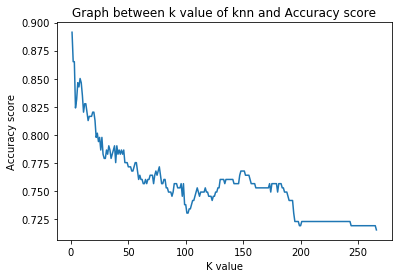

In [17]:
num = int(input('Enter The number of iteration you want for k: '))
prediction(num)

# Inference:
Highest Accuracy is 0.8913 when k=1 after that accuracy is increasing and decreasing.

So, k=1 is best for this model.